In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv(r"C:\Users\DELL\Downloads\HousePricePrediction.csv")

# Printing first 5 records of the dataset
(dataset.head(5))

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [3]:
dataset.shape


(2919, 13)

In [4]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 0
Float variables: 3


<Axes: >

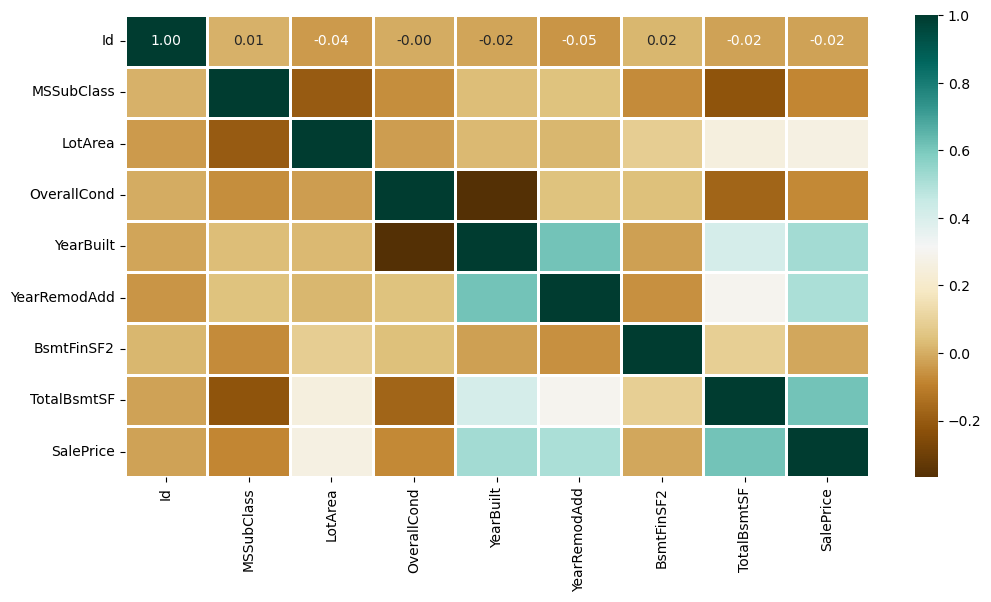

In [5]:
# Select only numerical features for correlation analysis
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

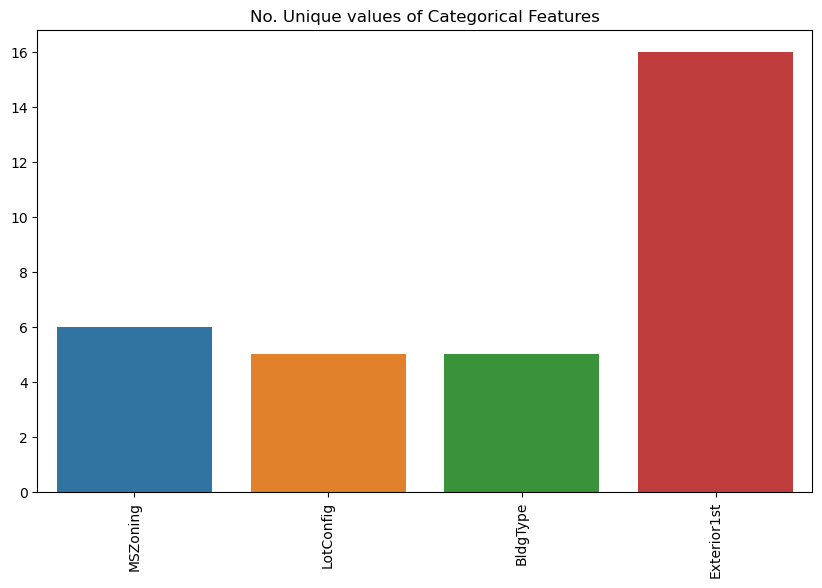

In [6]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

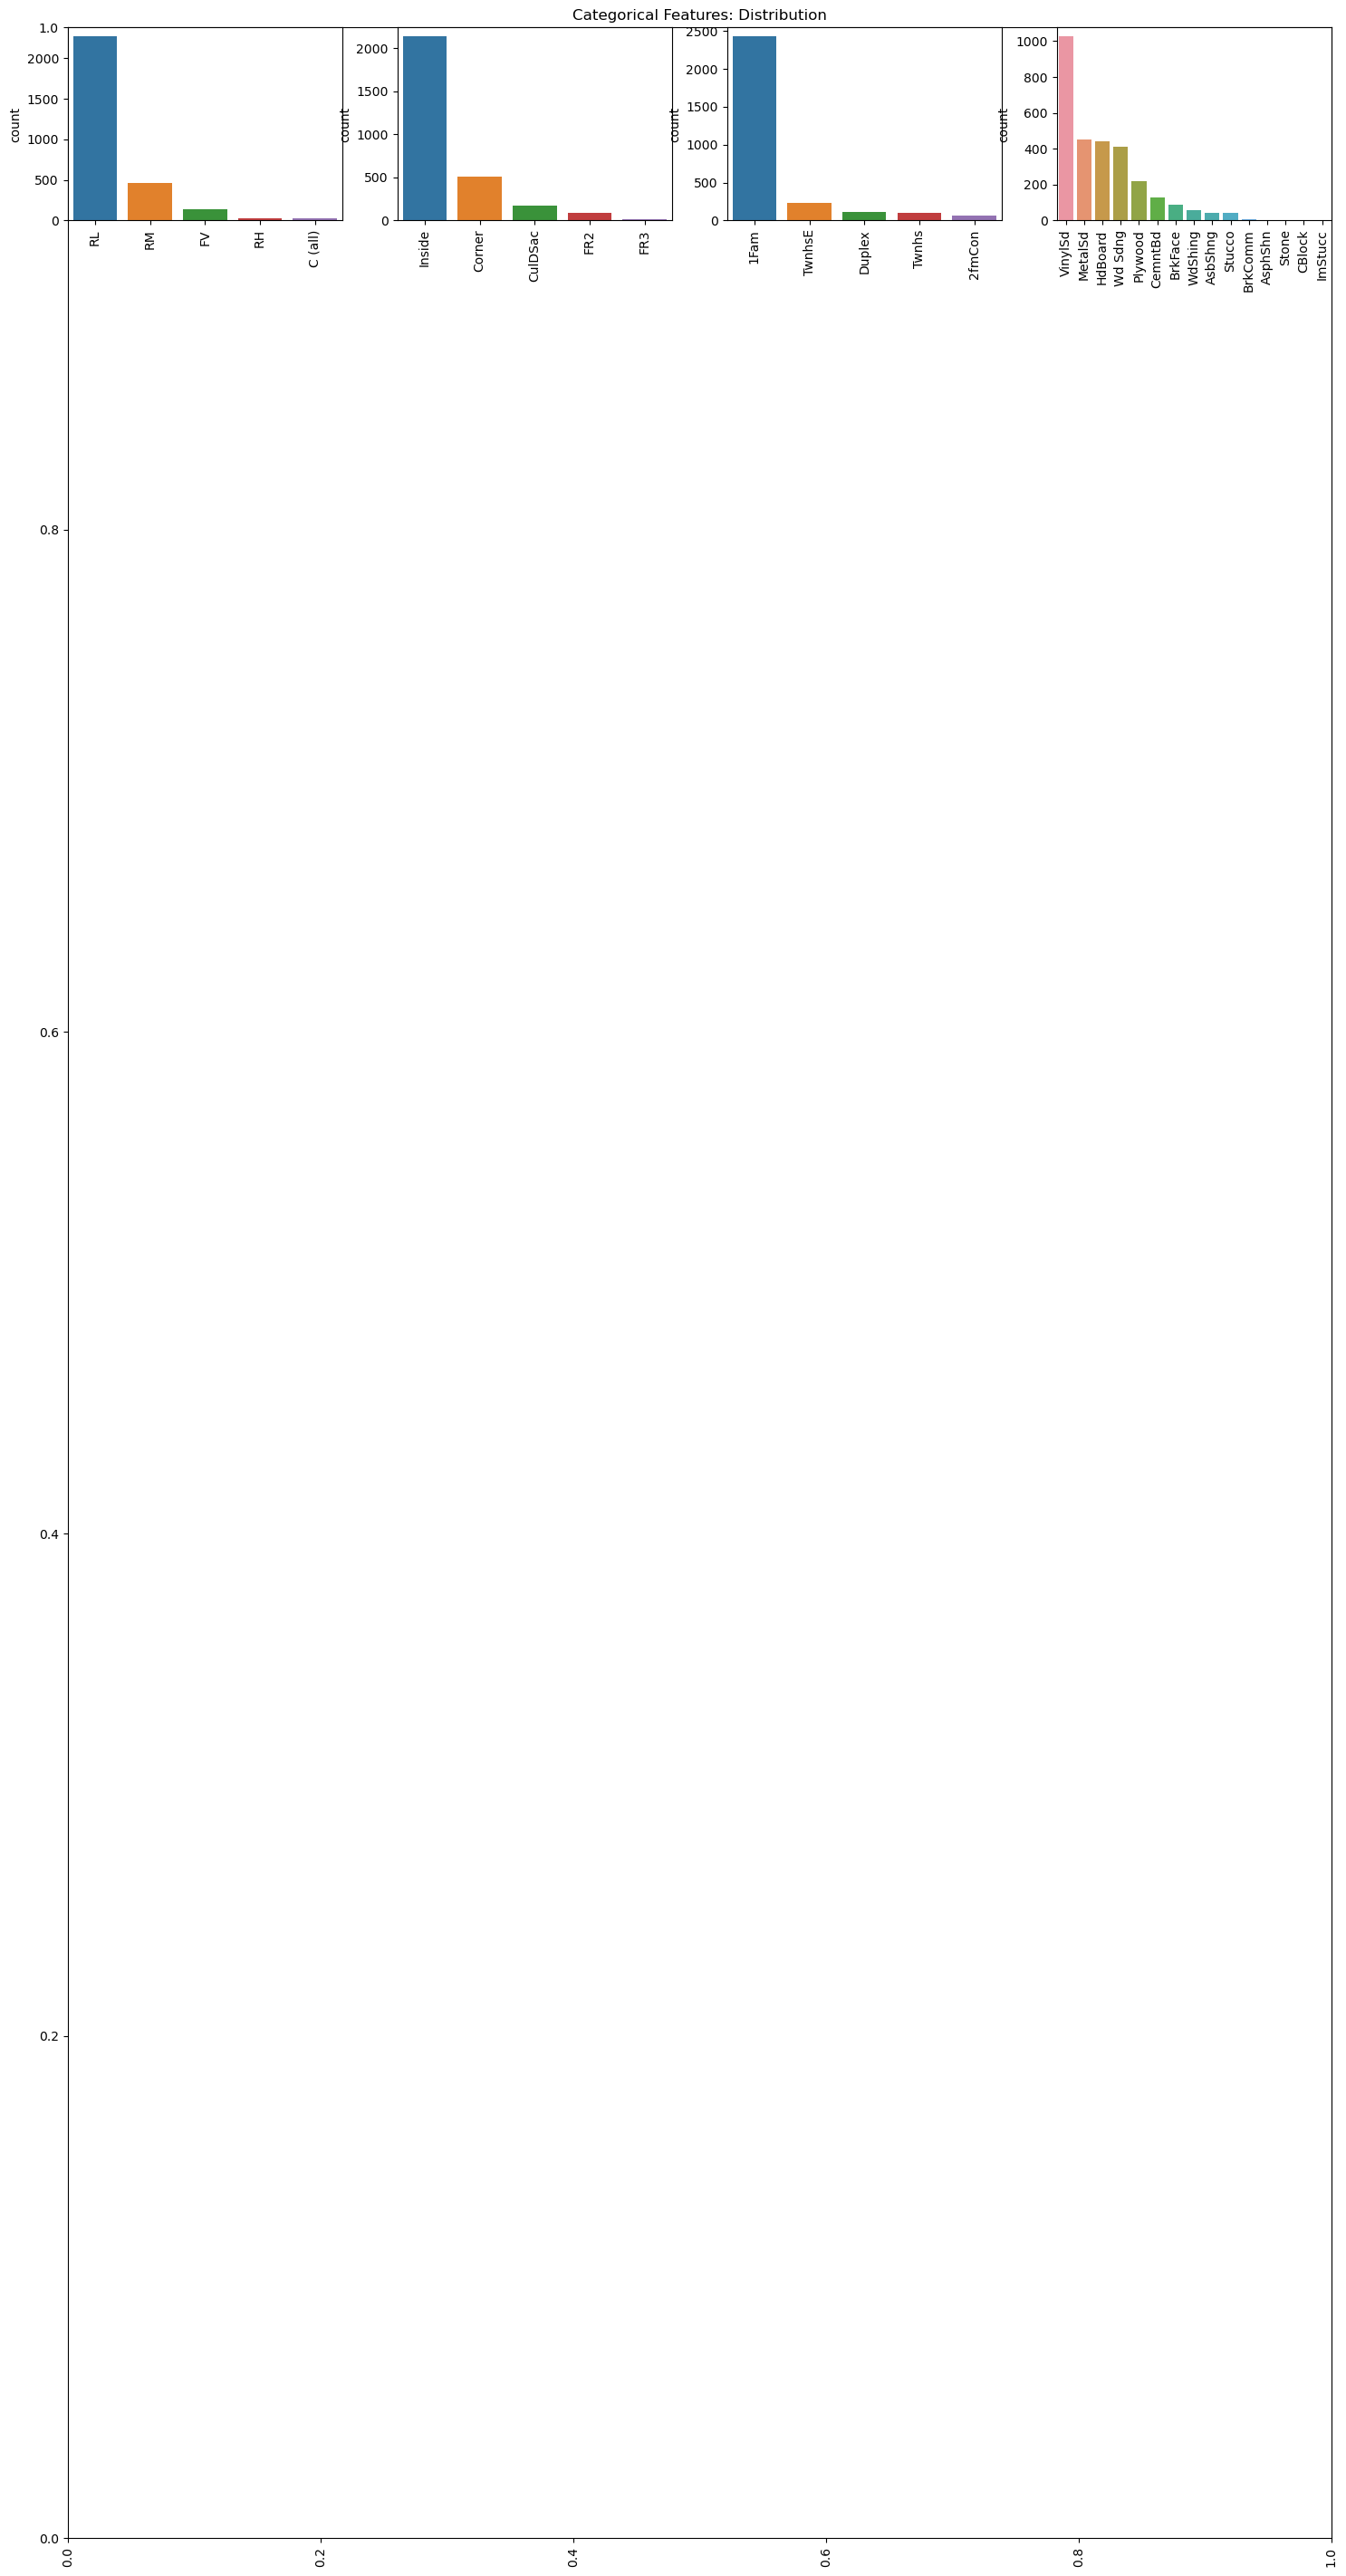

In [7]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = dataset[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1


In [8]:
dataset.drop(['Id'],
			axis=1,
			inplace=True)


In [9]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
dataset['SalePrice'].mean())


In [10]:
new_dataset = dataset.dropna()


In [11]:
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

NameError: name 'X' is not defined

In [13]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [14]:
OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [16]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423


In [17]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.1959159420870597

In [18]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18741683841599951


In [19]:


from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
#preds = cb_model.predict(X_valid)

cb_r2_score=r2_score(Y_valid, preds)
# cb_r2_score


Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 151ms	remaining: 2m 30s
1:	learn: 55780.1567575	total: 153ms	remaining: 1m 16s
2:	learn: 55060.9599505	total: 156ms	remaining: 51.7s
3:	learn: 54456.1126921	total: 158ms	remaining: 39.4s
4:	learn: 53901.1464265	total: 161ms	remaining: 32s
5:	learn: 53334.6062357	total: 165ms	remaining: 27.3s
6:	learn: 52824.4943646	total: 168ms	remaining: 23.8s
7:	learn: 52381.4267520	total: 171ms	remaining: 21.2s
8:	learn: 51841.0364316	total: 176ms	remaining: 19.4s
9:	learn: 51281.5852560	total: 179ms	remaining: 17.8s
10:	learn: 50825.3817438	total: 183ms	remaining: 16.4s
11:	learn: 50477.2609796	total: 186ms	remaining: 15.3s
12:	learn: 50081.4097641	total: 190ms	remaining: 14.4s
13:	learn: 49663.6380360	total: 194ms	remaining: 13.6s
14:	learn: 49334.5782662	total: 197ms	remaining: 12.9s
15:	learn: 48967.5221026	total: 200ms	remaining: 12.3s
16:	learn: 48676.4063222	total: 204ms	remaining: 11.8s
17:	learn: 48359.1169955	total: 212ms	remaini

NameError: name 'preds' is not defined

In [ ]:
import os
print(os.listdir())  # Check if "house_price_model.pkl" is present in your working directory


In [ ]:

dataset = dataset.dropna(subset=["SalePrice"]).reset_index(drop=True)




In [50]:
import pickle
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Load dataset (modify if needed)
df = pd.read_csv(r"C:\Users\DELL\Downloads\HousePricePrediction.csv")
# Change to your file path

if "SalePrice" in dataset.columns:
    dataset = dataset.dropna(subset=["SalePrice"]).reset_index(drop=True)
    print("Missing values in 'Price':", dataset["SalePrice"].isnull().sum())  # Should print 0
else:
    print("Error: Column 'Price' not found!")

# Define features and target
X = df.drop(columns=["SalePrice"])  # Assuming 'Price' is the target column
y = df["SalePrice"]

X = dataset.drop(columns=["SalePrice"])
y = dataset["SalePrice"]




print(model_pipeline.named_steps['preprocessor'].get_feature_names_out())


# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns

# Preprocessing for numerical and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Create a pipeline with preprocessing and model
model_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", LinearRegression())]
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
model_pipeline.fit(X_train, y_train)

# Save the pipeline
with open("house_price_pipeline.pkl", "wb") as file:
    pickle.dump(model_pipeline, file)

# Load the pipeline (for predictions)
with open("house_price_pipeline.pkl", "rb") as file:
    loaded_pipeline = pickle.load(file)

# Predict using the loaded pipeline
predictions = loaded_pipeline.predict(X_test)

# print("Predictions:", predictions[:5])  # Show first 5 predictions


Missing values in 'Price': 0
['num__Id' 'num__MSSubClass' 'num__LotArea' 'num__OverallCond'
 'num__YearBuilt' 'num__YearRemodAdd' 'num__BsmtFinSF2' 'num__TotalBsmtSF'
 'cat__MSZoning_C (all)' 'cat__MSZoning_FV' 'cat__MSZoning_RH'
 'cat__MSZoning_RL' 'cat__MSZoning_RM' 'cat__LotConfig_Corner'
 'cat__LotConfig_CulDSac' 'cat__LotConfig_FR2' 'cat__LotConfig_FR3'
 'cat__LotConfig_Inside' 'cat__BldgType_1Fam' 'cat__BldgType_2fmCon'
 'cat__BldgType_Duplex' 'cat__BldgType_Twnhs' 'cat__BldgType_TwnhsE'
 'cat__Exterior1st_AsbShng' 'cat__Exterior1st_AsphShn'
 'cat__Exterior1st_BrkComm' 'cat__Exterior1st_BrkFace'
 'cat__Exterior1st_CBlock' 'cat__Exterior1st_CemntBd'
 'cat__Exterior1st_HdBoard' 'cat__Exterior1st_ImStucc'
 'cat__Exterior1st_MetalSd' 'cat__Exterior1st_Plywood'
 'cat__Exterior1st_Stone' 'cat__Exterior1st_Stucco'
 'cat__Exterior1st_VinylSd' 'cat__Exterior1st_Wd Sdng'
 'cat__Exterior1st_WdShing']


In [22]:
print(dataset["SalePrice"].isnull().sum())  # Check number of missing values in "Price"


0


In [23]:
print(y.isnull().sum())  # Ensure y has no NaN values before training


1459


In [24]:
print(dataset["SalePrice"].isnull().sum())  # Check how many NaN values exist in "Price"
print(dataset.shape)  # Check dataset size


0
(2919, 12)


In [25]:
# Remove rows where Price is NaN
dataset = dataset.dropna(subset=["SalePrice"]).reset_index(drop=True)

# Check again after dropping NaN values
print(dataset["SalePrice"].isnull().sum())  # Should print 0
print(dataset.shape)  # New dataset size after removing NaNs


0
(2919, 12)


In [26]:
print(y.isnull().sum())  # Should print 0


1459


In [27]:
print(dataset.columns)  # See all column names


Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')


In [28]:
# Ensure "Price" column exists
if "Price" in dataset.columns:
    dataset = dataset.dropna(subset=["SalePrice"]).reset_index(drop=True)
else:
    print("Column 'Price' not found! Check column names.")

# Verify if NaN values are removed
print("Missing values in 'Price':", dataset["SalePrice"].isnull().sum())


Column 'Price' not found! Check column names.
Missing values in 'Price': 0


In [29]:
print(dataset[dataset["SalePrice"].isnull()])  # Show rows where Price is NaN


Empty DataFrame
Columns: [MSSubClass, MSZoning, LotArea, LotConfig, BldgType, OverallCond, YearBuilt, YearRemodAdd, Exterior1st, BsmtFinSF2, TotalBsmtSF, SalePrice]
Index: []


In [ ]:
# Redefine X and y AFTER dropping NaN values
X = dataset.drop(columns=["SalePrice"])
y = dataset["SalePrice"]

print(y.isnull().sum())  # Should print 0 now


In [38]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Load dataset
dataset = pd.read_csv("HousePricePrediction.csv")  # Update filename if needed

# 🔍 Check column names
print("Columns:", dataset.columns)

# 🔹 Drop rows where "Price" is NaN
if "SalePrice" in dataset.columns:
    dataset = dataset.dropna(subset=["SalePrice"]).reset_index(drop=True)
    print("Missing values in 'Price':", dataset["SalePrice"].isnull().sum())  # Should print 0
else:
    print("Error: Column 'Price' not found!")

# 🔹 Define X and y AFTER dropping NaN values
X = dataset.drop(columns=["SalePrice"])
y = dataset["SalePrice"]

# 🔍 Final check
print("Missing values in y:", y.isnull().sum())  # This should print 0

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

# Define preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),  # Handle missing values
        ("scaler", StandardScaler())  # Scale numerical features
    ]), num_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill missing values
        ("encoder", OneHotEncoder(handle_unknown="ignore"))  # Encode categorical features
    ]), cat_cols)
])

# Define the full model pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Train the model
model.fit(X_train, y_train)

# Save the fitted model
with open("house_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model trained and saved successfully!")


Columns: Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')
Missing values in 'Price': 0
Missing values in y: 0
✅ Model trained and saved successfully!


In [21]:
print("Missing values in y:", y.isnull().sum()) 

Missing values in y: 1459


In [30]:
X = X.dropna()


In [31]:
X = X.dropna()
y = y.loc[X.index]  # Ensures y matches the updated X


In [35]:
X = X.dropna()
y = y.loc[X.index]  # Ensure alignment



In [54]:
import pickle
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv(r"C:\Users\DELL\Downloads\HousePricePrediction.csv") 
# Replace with your file path

# Drop rows with missing target values
df = df.dropna(subset=["SalePrice"]).reset_index(drop=True)

# Separate features and target
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(exclude=["object"]).columns

# Preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Pipeline
model_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", LinearRegression())]
)

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)

# Save the pipeline
with open("house_price_pipeline_all.pkl", "wb") as file:
    pickle.dump(model_pipeline, file)

print("Pipeline saved as house_price_pipeline_all.pkl")

# Example of loading and prediction
with open("house_price_pipeline_all.pkl", "rb") as file:
    loaded_pipeline = pickle.load(file)

predictions = loaded_pipeline.predict(X_test)
print("Example Predictions:", predictions[:5])

Pipeline saved as house_price_pipeline_all.pkl
Example Predictions: [168733.00189055 243223.76121104 114785.41227821 157880.21908254
 254517.60086045]


In [53]:
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [58]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Load dataset
dataset = pd.read_csv("HousePricePrediction.csv")

# Select relevant features
# assumed column names

# Check if columns exist
for col in selected_features:
    if col not in dataset.columns:
        raise ValueError(f"Column '{col}' not found in the dataset.")

dataset = dataset[selected_features].dropna(subset=["SalePrice"]).reset_index(drop=True)

# Define X and y
X = dataset.drop(columns=["SalePrice"])
y = dataset["SalePrice"]

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

# Define preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]), num_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

# Define the full model pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Save the fitted model
with open("house_price_model_selected.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model trained and saved successfully with selected features!")

✅ Model trained and saved successfully with selected features!


In [57]:
import sklearn
import numpy

print("scikit-learn version:", sklearn.__version__)
print("NumPy version:", numpy.__version__)

scikit-learn version: 1.2.2
NumPy version: 1.26.4
